In [2]:
from __init__ import *

#print train_tun_Y[:10]
#HTML(train_tun_X_orig.head(10).to_html())

In [3]:
for col in train_tun_X_orig.columns.values:
    print "'" + col + "'" + ","

'_coordinates',
'_sent',
'a_head_form',
'a_head_number',
'a_head_pos',
'a_hypernyms',
'a_non_article_det',
'a_parent',
'a_pos_after_head',
'a_pos_before_head',
'a_referent',
'a_words_after_head',
'a_words_after_np',
'a_words_before_head',
'a_words_before_np',
'b_head_pos_simple',
'b_head_proper',
'b_is_postmodified',
'b_postmodification_length',
'b_postmodification_pp_of',
'b_postmodification_type',
'b_postmodification_type_specific',


In [78]:
from pandas import pivot_table
import numpy as np
df = pandas.DataFrame()
df['Y'] = train_tun_Y
df['OF'] = train_tun_X_orig.apply(lambda x: x['b_postmodification_type'] == 'PP' and x['b_postmodification_type_specific'].lower() == 'of', axis=1)
table = pivot_table(df, index='OF', columns='Y', aggfunc=len, margins=True)
print table

Y            A      THE      ZERO       All
OF                                         
False  20830.0  44391.0  175051.0  240272.0
True    4053.0   7783.0   10980.0   22816.0
All    24883.0  52174.0  186031.0  263088.0


In [12]:
sel_features = [
#'_coordinates',
#'_sent',
'a_head_form',
'a_head_number',
#'a_head_pos',
'a_hypernyms',
'a_non_article_det',
'a_parent',
'a_pos_after_head',
'a_pos_before_head',
'a_referent',
'a_words_after_head',
'a_words_after_np',
'a_words_before_head',
'a_words_before_np',
'b_head_pos_simple',
'b_head_proper',
#'b_is_postmodified',
#'b_postmodification_length',
'b_postmodification_pp_of',
#'b_postmodification_type',
#'b_postmodification_type_specific',      
]
train_tun_X_resolved = resolve_list_features(train_tun_X_orig.ix[:,sel_features])
heldout_tun_X_resolved = resolve_list_features(heldout_tun_X_orig.ix[:,sel_features])
HTML(pandas.DataFrame([train_tun_X_resolved[0]]).to_html())
remove_nans_from_dicts(train_tun_X_resolved)
remove_nans_from_dicts(heldout_tun_X_resolved)

vec = DictVectorizer()
train_tun_X = vec.fit_transform(train_tun_X_resolved)
heldout_tun_X = vec.transform(heldout_tun_X_resolved)

#model_tun = LogisticRegression(solver='lbfgs' ,multi_class='multinomial')
model_tun = LogisticRegression(penalty='l1', solver='liblinear')
model_tun.fit(train_tun_X, train_tun_Y.ravel())
print model_tun.score(heldout_tun_X, heldout_tun_Y)

0.883584755855


0.883584755855 (l1, liblinear, 'a_head_form', 'a_head_number','a_hypernyms','a_non_article_det','a_parent','a_pos_after_head','a_pos_before_head','a_referent','a_words_after_head','a_words_after_np','a_words_before_head','a_words_before_np','b_head_pos_simple','b_head_proper', )

88169

In [35]:
train_X_resolved = resolve_list_features(train_X_orig.ix[:,2:])
heldout_X_resolved = resolve_list_features(heldout_X_orig.ix[:,2:])

In [37]:
remove_nans_from_dicts(train_X_resolved)
remove_nans_from_dicts(heldout_X_resolved)

In [4]:
vec = DictVectorizer()
train_X = vec.fit_transform(train_X_resolved)
heldout_X = vec.transform(heldout_X_resolved)

In [5]:
model = LogisticRegression(solver='lbfgs' ,multi_class='multinomial')
model.fit(train_X, train_Y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
print model.score(heldout_X, heldout_Y)

0.88050813815
0.862445414847


<b>Lee's result</b> 0.877

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


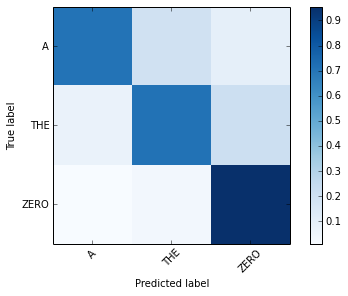

In [7]:
%matplotlib inline
import numpy
cm = confusion_matrix(heldout_Y, model.predict(heldout_X))
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
y_names = numpy.unique(heldout_Y.ravel())
plot_cm(cm_normalized, y_names)

In [8]:
print cm
print cm_normalized

[[ 630  177   84]
 [ 155 1544  463]
 [  77  248 6698]]
[[ 0.70707071  0.1986532   0.09427609]
 [ 0.07169288  0.71415356  0.21415356]
 [ 0.01096398  0.03531254  0.95372348]]


In [9]:
export_errors(model.predict(heldout_X), heldout_Y, heldout_X_orig, log_path)